# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution
</div>
****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [4]:
data.columns

Index(['id', 'ad', 'education', 'ofjobs', 'yearsexp', 'honors', 'volunteer',
       'military', 'empholes', 'occupspecific', 'occupbroad', 'workinschool',
       'email', 'computerskills', 'specialskills', 'firstname', 'sex', 'race',
       'h', 'l', 'call', 'city', 'kind', 'adid', 'fracblack', 'fracwhite',
       'lmedhhinc', 'fracdropout', 'fraccolp', 'linc', 'col', 'expminreq',
       'schoolreq', 'eoe', 'parent_sales', 'parent_emp', 'branch_sales',
       'branch_emp', 'fed', 'fracblack_empzip', 'fracwhite_empzip',
       'lmedhhinc_empzip', 'fracdropout_empzip', 'fraccolp_empzip',
       'linc_empzip', 'manager', 'supervisor', 'secretary', 'offsupport',
       'salesrep', 'retailsales', 'req', 'expreq', 'comreq', 'educreq',
       'compreq', 'orgreq', 'manuf', 'transcom', 'bankreal', 'trade',
       'busservice', 'othservice', 'missind', 'ownership'],
      dtype='object')

In [5]:
data.call.describe()

count    4870.000000
mean        0.080493
std         0.272083
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: call, dtype: float64

### 1. What test is appropriate for this problem? Does CLT apply?
To compare outcomes for distinct groups, we'll use a two-sample test to determine statistically significant differences between call back rates. The resume experiment can be viewed as Bernoulli trials. We will assume the process for assigning names and distibuting resumes was random and independent for each resume. As with all Bernoulli trials, two outcomes are possible: call back (1) or no call back (0). Based on the large size of this study, it's reasonable to consider the probability of a call back to be constant from trial to trial.

Given we're working with Bernoulli trials, the partial sums of call backs will converge to a normal distribution. As the sample size is > 30 (N=4870), the Central Limit Theorem will apply.



#### Call Statistics by Name Type
* Sample size: n
* Sample proportion of callbacks: p = (number of callbacks) / n
* Sample standard deviation: s = $\sqrt{p(1-p) / n}$

In [6]:
w = data[data.race=='w']
b = data[data.race=='b']
all_callbacks = sum(data.call)
w_callbacks = sum(w.call)
b_callbacks = sum(b.call)

# Calculate callback proportion
p_all = all_callbacks / len(data)
p_w = w_callbacks / len(w)
p_b = b_callbacks / len(b)

# Calculate standard deviation
std_all = np.sqrt((p_all*(1-p_all))/len(data))
std_w = np.sqrt((p_w*(1-p_w))/len(w))
std_b = np.sqrt((p_b*(1-p_b))/len(b))

sample_stats = {'Race': ['All Names', 'White Names', 'Black Names'], 'Sample Count (n)': [len(data), len(w), len(b)], 
                'Callbacks': [all_callbacks, w_callbacks, b_callbacks], 'Proportion Called (p)': [p_all, p_w, p_b],
                'Standard Deviation (std)': [std_all, std_w, std_b]}
statistics = pd.DataFrame(sample_stats)
statistics

,Race,Sample Count (n),Callbacks,Proportion Called (p),Standard Deviation (std)
0,All Names,4870,392.0,0.080493,0.003898
1,White Names,2435,235.0,0.096509,0.005984
2,Black Names,2435,157.0,0.064476,0.004977


In [7]:
# By what magnitude does a white name increase callback rate?
.096509/0.064476

1.4968205223649107

**Observation:**
Initial calculations show race may be a factor in callback success. In our sample, resumes with white-sounding names were called back at a rate of about 9.65% versus 6.45% for resumes with black-sounding names.

### 2. What are the null and alternate hypotheses?
* **H<sub>0</sub>**: Our null hypothesis is that there is no difference between the proportion of callbacks for resumes with white sounding names vs. black sounding names. P<sub>w</sub> - P<sub>b</sub>= 0
* **H<sub>a</sub>**: Our alternative hypothesis is that there is a difference between the proportion of callbacks for resumes with white sounding names vs. black sounding names. P<sub>w</sub> - P<sub>b</sub> > 0
* **_&alpha;_**: Set alpha to be 2.5% for a two sided 95% confidence interval.

### 3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
* Margin of error: MoE = z * s
* To calculate a 95% confindence interval, use z = 1.96
* Confidence interval = ( P<sub>w</sub> - P<sub>b</sub> ) $\pm$ MoE

#### Frequentist method

In [8]:
# Calculate difference of proportion and standard deviation
p_diff = p_w - p_b
std_diff = np.sqrt((std_w)**2 + (std_b)**2)


# Use z = 1.96 to calculate margin of error for a 95% confindence interval
margin_error = 1.96 * std_diff
conf_int =  [(p_diff - margin_error), (p_diff + margin_error)]

# Print the results
print('Difference in proportions =', p_diff)
print("Margin of error = ", margin_error)
print('95% Confidence interval =', conf_int)


Difference in proportions = 0.032032854209445585
Margin of error =  0.015255406349886438
95% Confidence interval = [0.016777447859559147, 0.047288260559332024]


#### Bootstrapping for Visualization
From the Central Limit Theorem, we can consider the difference of proportions to be normally distributed. After generating 10,000 differences in callback rates, we can visualize how statistically reasonable it is that the true difference is zero.

difference of proportions = 0.032032854209445585
95% confidence interval = [0.01692061 0.04722405]
z-score = 4.11555043573
p-value = 1.9312826037620745e-05


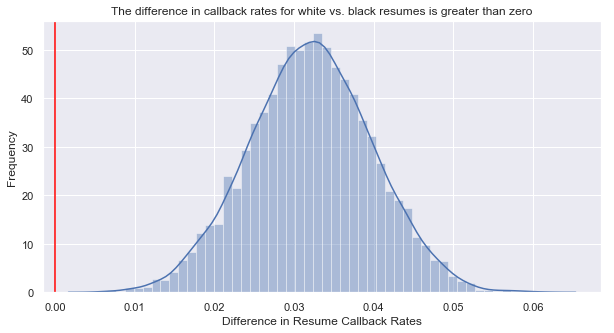

In [9]:
# Sample normal distribution of proportion difference
distrib_diff = np.random.normal(p_diff, std_diff, 10000)

# Calculate the z-score for a difference = 0
z_score = (p_diff - 0) / std_diff

# Calculate p-value
p = stats.norm.cdf(z_score)

# Compute 95% confidence interval with bootstrapping
conf_int_bs = np.percentile(distrib_diff, [2.5, 97.5])

# Print the results
print('difference of proportions =', p_diff)
print('95% confidence interval =', conf_int_bs)
print('z-score =', z_score)
print('p-value =', (1-p))

# Plot visualization of the difference in callback proportions
fig = plt.figure(figsize=(10,5))
ax1 = sns.distplot(distrib_diff)
az1 = plt.axvline(x=0, color='red')

ax1.set_title('The difference in callback rates for white vs. black resumes is greater than zero')
ax1.set_xlabel('Difference in Resume Callback Rates')
ax1.set_ylabel('Frequency')
plt.show()


#### Conlcusion:
By calculating the difference and spread (standard deviation) of resume call rates, we can model what might happen if we repeated the experiment. We would expect 95% of further trials to show that resumes with white-sounding names have a callback rate 1.7% to 4.7% higher than resumes with black-sounding names. The chances are near zero that any sample would show equal callback rates for both sets of resumes.

#### Another Bootstrapping approach
In this approach we'll treat the data as if there's no difference between callback rates based on name type. 
* The resumes will be combined, permuted and randomly resampled 1000 times with replacement. 
* The new samples will be split into two groups the same size as our original data.
* With both groups randomly chosen from the same pool, the mean difference in callback rates between the two new groups should be zero.
* We'll compare the middle 95% of the resampled differences to our observed difference of .032. If our observed difference is outside the confidence interval, we'll consider race to be a statistically significant factor in resume callback rates.

In [10]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates. 
       Func must take 2 arrays as input."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def call_diff(sample_1, sample_2):
    """Compute fraction of resumes called back."""
    frac1 = np.sum(sample_1) / len(sample_1)
    frac2 = np.sum(sample_2) / len(sample_2)
    diff = frac1-frac2
    return diff

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(w.call, b.call, call_diff, 10000)

# Compute and print p-value: p
p = np.sum(perm_replicates >= p_diff) / len(perm_replicates)

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(perm_replicates, [2.5, 97.5])

# Print the results
print('Observed difference of proportions =', p_diff)
print('95% confidence interval assuming difference = 0: ', conf_int)
print('p-value =', p)

Observed difference of proportions = 0.032032854209445585
95% confidence interval assuming difference = 0:  [-0.01560575  0.01478439]
p-value = 0.0001


#### Conclusion:
The p-value is close to 0, thus we will reject our null hypothesis. We can confidently assert there is a statistically significant difference in the callback rates between white- and black-sounding names.

### 4. Write a story describing the statistical significance in the context of the original problem.

A study conducted to examine racial discrimination in the United States labor market found that only 6.45% of resumes with black-sounding names received requests for interviews. The **callback rate was 1.5 times higher** (9.65%) when white-sounding names were assigned to identical resumes.

Scoring an interview is tough, as we saw that neither group had a callback rate above 10%. **Is it possible the difference of 3.2% was due to random chance instead of racial bias?**

This experiment follows a Bernoulli distribution, where each trial (resume sent out) has two possible outcomes (callback or no callback). When comparing two groups in the same set of trials, we know that the difference in success rate is normally distributed.  By calculating the mean and standard deviation of the difference in resume callback rates, we can model what might happen if the experiment was repeated. 

If these trials were run thousands of times, we would expect 95% of them to show that **resumes with white-sounding names have a callback rate 1.7% to 4.7% higher than resumes with black-sounding names.** There is a near zero probability that any sample would show equal callback rates for both groups. Thus, we conclude there is a statistically significant difference in the callback rates for resumes with white- vs. black-sounding names. Racial discrimination continues to affect the United States labor market. 

### 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

Although race/name is a statistically significant factor in callback success, there may be other factors with an even stronger correlation. To be thorough, we could examine the correlation between callback rate and each factor in our dataset. Even so, there may be unknown confounders not taken into account during the design of this study.